Epoch 1/30
600/600 - 51s - loss: 0.6987 - accuracy: 0.7437 - val_loss: 0.5420 - val_accuracy: 0.8035 - 51s/epoch - 84ms/step
Epoch 2/30
600/600 - 39s - loss: 0.4190 - accuracy: 0.8473 - val_loss: 0.4435 - val_accuracy: 0.8532 - 39s/epoch - 65ms/step
Epoch 3/30
600/600 - 36s - loss: 0.3474 - accuracy: 0.8744 - val_loss: 0.3112 - val_accuracy: 0.8920 - 36s/epoch - 60ms/step
Epoch 4/30
600/600 - 36s - loss: 0.3141 - accuracy: 0.8864 - val_loss: 0.3834 - val_accuracy: 0.8734 - 36s/epoch - 60ms/step
Epoch 5/30
600/600 - 36s - loss: 0.2922 - accuracy: 0.8942 - val_loss: 0.3144 - val_accuracy: 0.8887 - 36s/epoch - 60ms/step
Epoch 6/30
600/600 - 36s - loss: 0.2777 - accuracy: 0.8987 - val_loss: 0.3971 - val_accuracy: 0.8632 - 36s/epoch - 60ms/step
Epoch 7/30
600/600 - 36s - loss: 0.2652 - accuracy: 0.9036 - val_loss: 0.2630 - val_accuracy: 0.9114 - 36s/epoch - 60ms/step
Epoch 8/30
600/600 - 38s - loss: 0.2501 - accuracy: 0.9100 - val_loss: 0.3061 - val_accuracy: 0.8980 - 38s/epoch - 64ms/step


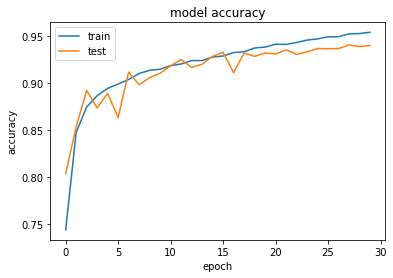

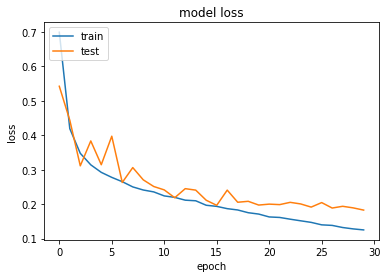

Test loss: 0.1827760487794876
Test accuracy: 0.9397000074386597


In [1]:
#Arthur Augusto Soares de Oliveira 9922190
#Caio Sobrerira monteiro 9922314
#vgg3.py 
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
#os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt; import numpy as np
import cv2
import tensorflow

def impHistoria(history):
  print(history.history.keys())
  plt.plot(history.history['accuracy']); plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy'); plt.ylabel('accuracy'); plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left'); plt.show()
  plt.plot(history.history['loss']); plt.plot(history.history['val_loss'])
  plt.title('model loss'); plt.ylabel('loss'); plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left'); plt.show()

batch_size = 100; num_classes = 10; epochs = 30
nl, nc = 32,32; input_shape = (nl, nc, 1)
(AX, ay), (QX, qy) = fashion_mnist.load_data()
AX = AX.astype('float32'); AX /= 255 #0 a 1
QX = QX.astype('float32'); QX /= 255 #0 a 1
ay = keras.utils.to_categorical(ay, num_classes)
qy = keras.utils.to_categorical(qy, num_classes)

ax = np.ones(61440000).reshape(60000,32,32)
qx = np.ones(10240000).reshape(10000,32,32)

for i in range(AX.shape[0]):
  ax[i]=cv2.copyMakeBorder(AX[i],2,2,2,2,cv2.BORDER_CONSTANT,0)
for i in range(QX.shape[0]):
  qx[i]=cv2.copyMakeBorder(QX[i],2,2,2,2,cv2.BORDER_CONSTANT,0)

ax = np.expand_dims(ax,axis=3)
qx = np.expand_dims(qx,axis=3)

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #20x16x16x3

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #40x8x8x3

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #80x4x4x3

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #160x2x2x3

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x2x2x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x2x2x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x2x2x3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #160x1x1x3

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(num_classes,activation='softmax'))

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='vgg3.png', show_shapes=True); #model.summary()

datagen = ImageDataGenerator(
  featurewise_center=False,  # set input mean to 0 over the dataset
  samplewise_center=False,  # set each sample mean to 0
  featurewise_std_normalization=False,  # divide inputs by std of the dataset
  samplewise_std_normalization=False,  # divide each input by its std
  zca_whitening=False,  # apply ZCA whitening
  rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
  width_shift_range=0.05,  # randomly shift images horizontally (fraction of total width)
  height_shift_range=0.05,  # randomly shift images vertically (fraction of total height)
  horizontal_flip=False,  # randomly flip images
  vertical_flip=False)  # randomly flip images
datagen.fit(ax)

opt=optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(datagen.flow(ax,ay,batch_size=batch_size), steps_per_epoch=ax.shape[0]//batch_size,epochs=epochs, verbose=2, validation_data=(qx, qy))
impHistoria(history)

score = model.evaluate(qx, qy, verbose=0)
print('Test loss:', score[0]); print('Test accuracy:', score[1])
model.save('vgg3.h5')